In [1]:
from time import time
import cv2 as cv
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


(32400,)


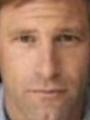

In [2]:
from IPython.display import display
from PIL import Image

img = cv.imread('../data/prepare/resized/Aaron_Eckhart_0001.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

print(img_rgb.flatten().shape)
display(Image.fromarray(img_rgb))

In [3]:
import os
resized_path = "../data/prepare/resized"

def to_feature(image_name):
    file_path = os.path.join(resized_path, image_name)
    img = cv.imread(file_path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    return img_rgb.flatten()

features = [ to_feature(name) for name in os.listdir(resized_path)]
print(features)

[array([ 86,  62,  34, ..., 103, 105, 102], dtype=uint8), array([18, 16,  4, ...,  9, 10,  5], dtype=uint8), array([ 96,  76,  78, ..., 111,  90,  95], dtype=uint8), array([117,  89,  39, ..., 146, 148, 137], dtype=uint8), array([  2,   1,   0, ..., 149, 157, 160], dtype=uint8), array([ 61,  33,   9, ..., 202, 196, 184], dtype=uint8), array([ 75,  49,  36, ..., 125,  85,  60], dtype=uint8), array([ 35,  54,  52, ..., 128,  90,  28], dtype=uint8), array([59, 54, 35, ..., 37, 34, 51], dtype=uint8), array([38, 24, 39, ..., 26, 27, 31], dtype=uint8), array([ 54,  60,  56, ...,  71, 121, 156], dtype=uint8), array([12,  9,  0, ..., 37, 33, 70], dtype=uint8), array([114,  79,  23, ...,  66,  39,  10], dtype=uint8), array([146, 114, 101, ...,  15,  13,  16], dtype=uint8), array([ 51,  51,  51, ..., 101, 107, 103], dtype=uint8), array([105,  87,  73, ..., 116,  95,  64], dtype=uint8), array([122,  91,  63, ..., 227, 222, 219], dtype=uint8), array([149, 122,  79, ..., 232, 225, 232], dtype=uint8

In [4]:
import numpy as np 
features_mat = np.asarray(features)


# normalize
def image_normalize(image_mat):
    new_mat = np.copy(image_mat)
    new_mat = new_mat / 255
    return new_mat 

features_mat =  image_normalize(features_mat)

print(features_mat.shape)

(5749, 32400)


In [5]:
# Build the pca model

n_components = 384

t0 = time()
pca = PCA(n_components=n_components, svd_solver="auto", whiten=True).fit(features_mat)
print("done in %0.3fs" % (time() - t0))

done in 19.244s


(120, 90, 3)
(120, 90)


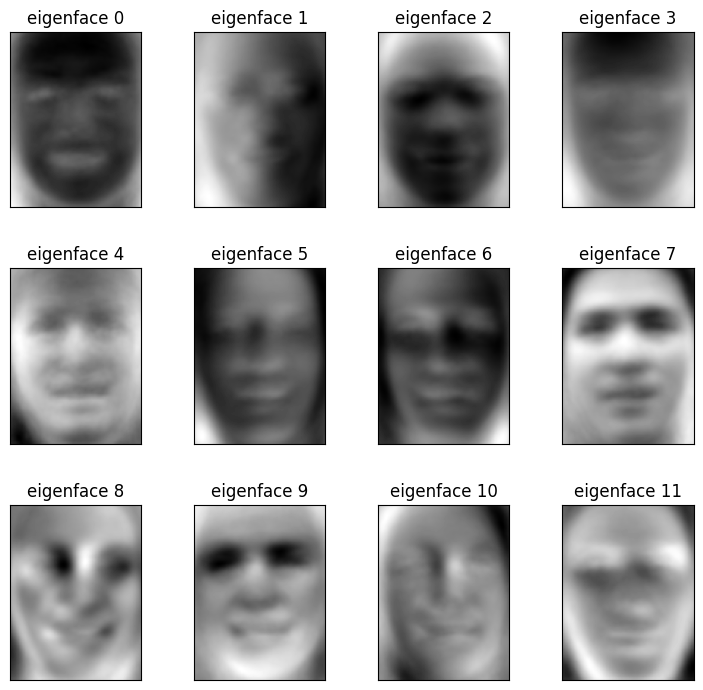

In [6]:
# plot the eigenfaces

def to_gray_eigenface(eigenface):
    return eigenface[..., :3] @ [0.299, 0.587, 0.114]

def plot_gallery(images, titles, h=120, w=90, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.90, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


eigenfaces = pca.components_.reshape((n_components, 120, 90, 3))
print(eigenfaces[0].shape)

eigenface_titles = ["eigenface %d" % i for i in range(eigenfaces.shape[0])]
gray_eigenfaces = [to_gray_eigenface(eigenface) for eigenface in eigenfaces[:20]]
print(gray_eigenfaces[0].shape)


plot_gallery(gray_eigenfaces, eigenface_titles)

In [9]:
# generate the embedding data

image_names = [ name for name in os.listdir(resized_path)]
print(image_names)

all_embeddings = pca.transform(features_mat)
print(all_embeddings.shape)

zipped = zip(image_names, all_embeddings)
embed_dict = { name:embed for (name, embed) in zipped}
embed_dict

['Aaron_Eckhart_0001.jpg', 'Aaron_Guiel_0001.jpg', 'Aaron_Patterson_0001.jpg', 'Aaron_Peirsol_0001.jpg', 'Aaron_Pena_0001.jpg', 'Aaron_Sorkin_0001.jpg', 'Aaron_Tippin_0001.jpg', 'Abbas_Kiarostami_0001.jpg', 'Abba_Eban_0001.jpg', 'Abdel_Aziz_Al-Hakim_0001.jpg', 'Abdel_Madi_Shabneh_0001.jpg', 'Abdel_Nasser_Assidi_0001.jpg', 'Abdoulaye_Wade_0001.jpg', 'Abdulaziz_Kamilov_0001.jpg', 'Abdullah_0001.jpg', 'Abdullah_Ahmad_Badawi_0001.jpg', 'Abdullah_al-Attiyah_0001.jpg', 'Abdullah_Gul_0001.jpg', 'Abdullah_Nasseef_0001.jpg', 'Abdullatif_Sener_0001.jpg', 'Abdul_Majeed_Shobokshi_0001.jpg', 'Abdul_Rahman_0001.jpg', 'Abel_Aguilar_0001.jpg', 'Abel_Pacheco_0001.jpg', 'Abid_Hamid_Mahmud_Al-Tikriti_0001.jpg', 'Abner_Martinez_0001.jpg', 'Abraham_Foxman_0001.jpg', 'Aby_Har-Even_0001.jpg', 'Adam_Ant_0001.jpg', 'Adam_Freier_0001.jpg', 'Adam_Herbert_0001.jpg', 'Adam_Kennedy_0001.jpg', 'Adam_Mair_0001.jpg', 'Adam_Rich_0001.jpg', 'Adam_Sandler_0001.jpg', 'Adam_Scott_0001.jpg', 'Adelina_Avila_0001.jpg', 'Adel_

{'Aaron_Eckhart_0001.jpg': array([-0.25572141,  1.99489353, -0.73815542,  0.05918506, -0.31984897,
        -0.54105744,  0.14501096, -0.07093346, -0.34771365,  0.03126182,
        -0.54232963, -0.56479006,  0.40001182, -0.69290774, -0.60725982,
         0.11184382,  0.68046967,  0.22993967,  0.34116396, -1.49698998,
         0.24661114,  0.39382283, -1.86215423, -0.54106077, -0.05561462,
        -0.195396  , -0.34663621, -0.74341206, -0.05536446,  0.97791227,
         0.46581427,  0.68060784,  0.62346909,  1.23244123, -0.39572153,
         0.45771596,  1.04119352, -0.61023679, -0.52876954, -0.85314151,
        -0.11417734,  0.86312078,  1.20479134, -0.61685601, -0.38974907,
        -0.73237389, -0.21464335, -0.53822994, -0.46456219,  0.6089042 ,
        -0.92426147, -0.91541242, -0.13090961,  0.74892357,  0.17061174,
        -0.24587321,  0.78578324,  0.5693059 ,  0.64841145, -1.50139873,
        -0.37109157, -0.46267638, -0.2201824 ,  0.30055595,  0.80457016,
        -0.2253914 , -0.5

In [11]:
# store the embeddings 
import h5py

f = h5py.File("../data/eigenface_embeds.h5", "w")
f.create_dataset('names', data=image_names)
f.create_dataset('embeds', data=all_embeddings)

f.close()

In [14]:
h5f = h5py.File('../data/eigenface_embeds.h5','r')
print(h5f['names'][0])

print(h5f['embeds'][0])
h5f.close()

b'Aaron_Eckhart_0001.jpg'
[-0.25572141  1.99489353 -0.73815542  0.05918506 -0.31984897 -0.54105744
  0.14501096 -0.07093346 -0.34771365  0.03126182 -0.54232963 -0.56479006
  0.40001182 -0.69290774 -0.60725982  0.11184382  0.68046967  0.22993967
  0.34116396 -1.49698998  0.24661114  0.39382283 -1.86215423 -0.54106077
 -0.05561462 -0.195396   -0.34663621 -0.74341206 -0.05536446  0.97791227
  0.46581427  0.68060784  0.62346909  1.23244123 -0.39572153  0.45771596
  1.04119352 -0.61023679 -0.52876954 -0.85314151 -0.11417734  0.86312078
  1.20479134 -0.61685601 -0.38974907 -0.73237389 -0.21464335 -0.53822994
 -0.46456219  0.6089042  -0.92426147 -0.91541242 -0.13090961  0.74892357
  0.17061174 -0.24587321  0.78578324  0.5693059   0.64841145 -1.50139873
 -0.37109157 -0.46267638 -0.2201824   0.30055595  0.80457016 -0.2253914
 -0.52251527 -0.75048831  0.32584148  0.63169004  0.59537178 -1.52686886
  0.00762331  0.55956813  0.97707519 -0.95099744  0.15034423  0.2145247
 -0.40235612  0.64778954 -1